> Игорь Сорочан
# Домашнее задание к лекции "Визуализация данных"
## Обязательная часть
Вам необходимо провести базовый [EDA](https://en.wikipedia.org/wiki/Exploratory_data_analysis) выбранного набора данных.

Требования к анализу:
* построить не менее 4 визуализаций различных видов;
* каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
* по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).  

**Откуда брать данные?**. 

Можете взять свои рабочие данные, либо найти открытые данные (например, на [kaggle.com](https://www.kaggle.com/)) по интересующей вас предметной области (тогда не забудьте приложить ссылку на данные). Если идей нет, можете взять один из перечисленных ниже:
* [данные приложений из Google Play](https://www.kaggle.com/lava18/google-play-store-apps);
* [данные о видео из трендов YouTube](https://www.kaggle.com/datasnaek/youtube-new);
* [данные об уровне счастья в разных странах](https://www.kaggle.com/unsdsn/world-happiness).  
## Дополнительная часть (необязательная)

* построить дополнительно не менее 2 визуализаций (итого не менее 6);
* в работе должны присутствовать следующие визуализации: boxplot, heatmap, scatter plot matrix;  
### ПРИМЕЧАНИЕ  

Домашнее задание сдается ссылкой [Google Colab](https://colab.research.google.com/). Не сможем проверить или помочь, если вы пришлете:
* файлы;
* архивы;
* скриншоты кода.  

Все обсуждения и консультации по выполнению домашнего задания ведутся только на соответствующем канале в slack.

Как правильно задавать вопросы аспирантам, преподавателям и коллегам
Прежде чем задать вопрос, попробуйте найти ответ в интернете. Навык самостоятельного поиска информации — один из важнейших. Каждый практикующий специалист любого уровня делает это ежедневно.

Сформулируйте вопрос по алгоритму:

1. Что я делаю?
1. Какого результата я ожидаю?
1. Как фактический результат отличается от ожидаемого?
1. Что я уже попробовал сделать, чтобы исправить проблему?  

По возможности прикрепите к вопросу скриншоты либо ссылки на код. Не выкладывайте все решение, оставляйте только проблемный и воспроизводимый участок кода.

# Loading data directly from Kaggle

In [ ]:
!pip install --upgrade --force-reinstall --no-deps kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 58 kB 3.0 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73052 sha256=55e176eb104f539de48fb152f7497443d90d5441d4a7f4d8c05c1abbcaa40bc8
  Stored in directory: /root/.cache/pip/wheels/29/da/11/144cc25aebdaeb4931b231e25fd34b394e6a5725cbb2f50106
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [ ]:
from google.colab import files
# installing kaggle api tocken
# https://che-13ds.quickconnect.to/d/s/rFu1TP7aW6Xwmn2y0faLtwqC1iyTKSCJ/6WRYhRF3GP_yrzG1S68ImVY3M1w47v1p-Lb3gQlg3FQo
uploaded = files.upload()
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
# loading dataset youtube-new (> 1 Gb)
!kaggle datasets download -d datasnaek/youtube-new

 92% 185M/201M [00:01<00:00, 157MB/s]
100% 201M/201M [00:01<00:00, 140MB/s]


In [ ]:
!unzip -q /content/youtube-new.zip -d youtube-new

# Loading an environment

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import numpy as np
from pprint import pprint
import json
import seaborn as sns
from scipy import stats
import plotly.express as px

# increase default figure size
from pylab import rcParams
# rcParams['figure.figsize'] = 11,7

SMALL_SIZE = 10
MEDIUM_SIZE = 14
BIGGER_SIZE = 16
plt.rc('figure', figsize = (11,7) )      # increase default figure size
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

### For this HW we use dataset covering **RU** youtube zone.

In [ ]:
df_RU = pd.read_csv('/content/youtube-new/RUvideos.csv', 
                    encoding_errors='ignore',
                    parse_dates=[1,5],  # columns 'trending_date' ,  'publish_time'
                    infer_datetime_format = True
                    )

## Initial to-do list:  
1. Check the data types of  variables -> **Done**
1. Find the category name for category Id column -> **Done**
1. Check duplicates and Nans -> **Done**

In [ ]:
df_RU.head(3)
# no encoding problems. So good so far

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,gDuslQ9avLc,17.14.11,Захар и Полина учатся экономить,Т—Ж БОГАЧ,22,2017-11-13 09:09:31+00:00,"захар и полина|""учимся экономить""|""копить день...",62408,334,190,50,https://i.ytimg.com/vi/gDuslQ9avLc/default.jpg,False,False,False,"Знакомьтесь, это Захар и Полина. Вместе с ними..."
1,AOCJIFEA_jE,17.14.11,Биржа Мемов #29. Большой выпуск,Druzhko Show,22,2017-11-13 17:32:11+00:00,"биржа мемов|""лев шагинян""|""мемы""|""пикчи""|""друж...",330043,43841,2244,2977,https://i.ytimg.com/vi/AOCJIFEA_jE/default.jpg,False,False,False,"В 29 выпуске Дружко Шоу Сергей сказал, что Бир..."
2,VAWNQDgwwOM,17.14.11,ХАЙП КЭМП - СВОЙ СРЕДИ ЧУЖИХ,Юлик,24,2017-11-13 16:11:31+00:00,"юмор|""комедия""|""влог""|""блог""|""смешно""|""смешное...",424596,49854,714,2944,https://i.ytimg.com/vi/VAWNQDgwwOM/default.jpg,False,False,False,http://kapitany.ru/!Yulik.cap - Факультет #Кап...


In [ ]:
df_RU.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40739 entries, 0 to 40738
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   video_id                40739 non-null  object             
 1   trending_date           40739 non-null  object             
 2   title                   40739 non-null  object             
 3   channel_title           40739 non-null  object             
 4   category_id             40739 non-null  int64              
 5   publish_time            40739 non-null  datetime64[ns, UTC]
 6   tags                    40739 non-null  object             
 7   views                   40739 non-null  int64              
 8   likes                   40739 non-null  int64              
 9   dislikes                40739 non-null  int64              
 10  comment_count           40739 non-null  int64              
 11  thumbnail_link          40739 non-null  o

In [ ]:
# trending date is still 'object'
# converting it manually
df_RU['trending_date'] = pd.to_datetime(df_RU['trending_date'], format='%y.%d.%m')

In [ ]:
# checking duplicates
print(f'{df_RU.duplicated().sum()} duplicated rows found')
df_RU[df_RU.duplicated()].head(3)

46 duplicated rows found


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
35826,a-GQDCtt1Vk,2018-05-20,Ленинград ft. Глюк’oZa (ft. ST) Жу-Жу / Lening...,Ленинград | Leningrad,10,2018-05-17 20:28:48+00:00,"группа Ленинград|""Leningrad band""|""Sergey Shnu...",3626343,183748,28554,18813,https://i.ytimg.com/vi/a-GQDCtt1Vk/default.jpg,False,False,False,Доступно в iTunes - https://apple.co/2Gt1e09Di...
35828,JATZ1CaPKlI,2018-05-20,ТРЭШ-ОБЗОР: Универ (Когда пора остановиться!),Chuck_review,1,2018-05-19 17:47:41+00:00,"badcomedian|""чак""|""обзор""|""соболев""|""топ 10""|""...",276655,43788,1258,4131,https://i.ytimg.com/vi/JATZ1CaPKlI/default.jpg,False,False,False,"Скачай Викинги, получи 200 золота!Android - ht..."
35829,8HRvTw3c4Lk,2018-05-20,Джентльмены без сдачи - Уральские Пельмени (2018),Уральские Пельмени,23,2018-05-18 19:00:02+00:00,"Джентльмены без сдачи|""уральские пельмени джен...",842504,10491,1835,1650,https://i.ytimg.com/vi/8HRvTw3c4Lk/default.jpg,False,False,False,Премьера! Новое шоу Джентльмены без сдачи Урал...


In [ ]:
# droping duplicates
df_RU.drop_duplicates(inplace=True)

In [ ]:
df_RU.info()
# dates have proper format now

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40693 entries, 0 to 40738
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   video_id                40693 non-null  object             
 1   trending_date           40693 non-null  datetime64[ns]     
 2   title                   40693 non-null  object             
 3   channel_title           40693 non-null  object             
 4   category_id             40693 non-null  int64              
 5   publish_time            40693 non-null  datetime64[ns, UTC]
 6   tags                    40693 non-null  object             
 7   views                   40693 non-null  int64              
 8   likes                   40693 non-null  int64              
 9   dislikes                40693 non-null  int64              
 10  comment_count           40693 non-null  int64              
 11  thumbnail_link          40693 non-null  o

In [ ]:
# lets find category_id meanings
with open('/content/youtube-new/RU_category_id.json', 'rb') as f:
    # RU_dict = pickle.load(f)    
    RU_dict = json.load(f)

In [ ]:
# analyzing dict structure
pprint(RU_dict)
# 'items' key contains a LIST of dictionaries 

{'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2qTj13hkQZk"',
 'items': [{'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
            'id': '1',
            'kind': 'youtube#videoCategory',
            'snippet': {'assignable': True,
                        'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
                        'title': 'Film & Animation'}},
           {'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
            'id': '2',
            'kind': 'youtube#videoCategory',
            'snippet': {'assignable': True,
                        'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
                        'title': 'Autos & Vehicles'}},
           {'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/nqRIq97-xe5XRZTxbknKFVe5Lmg"',
            'id': '10',
            'kind': 'youtube#videoCategory',
            'snippet': {'assignable': True,
                        'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
                        'title': 'Music'}},
 

In [ ]:
RU_dict['items'][0]
# RU_dict['id']                 -> category_id 
# RU_dict['snippet']['title']   -> category_name

{'kind': 'youtube#videoCategory',
 'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

In [ ]:
categories_dict = {}
cnt = 0
for i in RU_dict['items']:
    categories_dict.setdefault(int(i['id']), i['snippet']['title'])
    cnt += 1
categories_dict

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [ ]:
print(f'We have {cnt} categories in json dictionary')
print(f'We have only {df_RU.groupby(["category_id"])["category_id"].nunique().sum()} categories in the dataset')

We have 31 categories in json dictionary
We have only 17 categories in the dataset


In [ ]:
# finally define category NAMES
df_RU['cat_name'] = df_RU['category_id'].map(categories_dict)
df_RU['cat_name']

0        People & Blogs
1        People & Blogs
2         Entertainment
3        People & Blogs
4         Entertainment
              ...      
40734    People & Blogs
40735            Comedy
40736     Entertainment
40737    People & Blogs
40738               NaN
Name: cat_name, Length: 40693, dtype: object

In [ ]:
# finding NaNs
df_RU.isna().sum()

video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               2463
cat_name                  1539
dtype: int64

In [ ]:
# let's go deeper
df_RU[df_RU['description'].isna()].sample(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,cat_name
21098,NClnCAhZJqo,2018-03-01,Перевозчик (2 сезон) 3 серия,Сергей Зарвирог,22,2018-02-28 22:11:20+00:00,[none],4178,70,13,8,https://i.ytimg.com/vi/NClnCAhZJqo/default.jpg,False,False,False,NaN,People & Blogs
17014,3GwMXYfzX2k,2018-02-09,5 самых интересных выступлений президентов,Выбор 2018 Несерьёзно о серьёзном,22,2018-02-07 07:49:16+00:00,[none],102554,297,3753,3667,https://i.ytimg.com/vi/3GwMXYfzX2k/default.jpg,False,False,False,NaN,People & Blogs
29847,CCHRdwAdGsI,2018-04-20,Аёл бўрининг жинсий азосини эркак киши тақиб ю...,JATELID UZ,28,2018-04-19 17:05:54+00:00,[none],47751,722,52,112,https://i.ytimg.com/vi/CCHRdwAdGsI/default.jpg,False,False,False,NaN,Science & Technology


In [ ]:
# nothing special. Filling the gaps:
df_RU['description'] = df_RU['description'].fillna('w/o description') 

In [ ]:
df_RU[df_RU['cat_name'].isna()].head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,cat_name
57,DNzSAY6IuFY,2017-11-14,ЖЕСТКИЕ ПРЯТКИ В ОСОБНЯКЕ | СОБОЛЕВ И МУРАТАЕВ,ChebuRussiaTV,29,2017-11-12 12:19:20+00:00,"развлечения|""угар""|""смешно""|""челлендж""|""экспер...",747459,94626,1737,1777,https://i.ytimg.com/vi/DNzSAY6IuFY/default.jpg,False,False,False,Продолжение видео и наша реакцию у Саши на кан...,NaN
78,STNZtYOCLK4,2017-11-14,СЕГОДНЯ – НЕОБЫЧНЫЙ ДЕНЬ. УТРО с ВЕНИАМИНОМ. 1...,Veniamin Nikora,29,2017-11-13 07:11:26+00:00,"загадайжелание|""гороскоп""|""таро""|""гороскопнасе...",23293,967,54,175,https://i.ytimg.com/vi/STNZtYOCLK4/default.jpg,False,False,False,"Сегодня день, когда вы можете загадать самые с...",NaN
109,DeO_1Karalw,2017-11-14,Невозмутимость Сургутян или как в Сургуте горе...,Igor Kessler,29,2017-11-13 04:59:17+00:00,"Сургут|""Сургуте""|""Сургута""|""Сургутом""|""происше...",4148,2,0,0,https://i.ytimg.com/vi/DeO_1Karalw/default.jpg,False,False,False,Утром стоящие в пробке горожане могли недолго ...,NaN


In [ ]:
# all NaNs are in cat#29
df_RU[df_RU['cat_name'].isna()].query('category_id != 29') 
# Are there any NaNs in other categories?

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,cat_name


In [ ]:
# auxillary checking
df_RU['cat_name'].isna().sum() == df_RU.query('category_id == 29')['category_id'].count()

True

Cat #29 is missed in json dictionary for some reason.  
We replace these NaNs with mysterious 'Cat_29' string

In [ ]:
df_RU['cat_name'].fillna('cat_29', inplace=True)

In [ ]:
#Dropping useless columns
df_RU = df_RU.drop(['video_id','thumbnail_link','category_id'],axis=1)

In [ ]:
# converting views to mlns.
# df_RU[['views']] = df_RU[['views']] / 1e6
# others to hundreds of thousands
# df_RU[[	'likes', 'dislikes','comment_count']] = df_RU[[	'likes', 'dislikes','comment_count']] / 1e5

# Visualizations
## Main metrics

In [ ]:
df_cat = df_RU[['views','likes','dislikes','cat_name']].groupby('cat_name').sum().sort_values(by='views', ascending = False)

In [ ]:
df_cat.style.bar(align='mid')

,views,likes,dislikes
cat_name,,,
Entertainment,2085173930,98722681,9468423
People & Blogs,1558812093,72933374,11741732
Music,1538205868,115346854,7915727
Comedy,1014380959,69657339,7115344
News & Politics,738971930,15271834,9177453
Film & Animation,539714214,19084558,1183999
Science & Technology,424310893,25738857,1428242
Howto & Style,385738449,12685477,630462
Autos & Vehicles,383260752,21207565,1471138


Most of dislikes are in  
```
People & Blogs, News & Politics and cat_29
```
Troll Factory traces... Who knows?  

Let's visualize simple video metrics like views etc.  
On the other side most likes grabs the `music` category. 


In [ ]:
# for better visualization lets decrease the gap between views and likes
df_cat['likes'] = df_cat['likes']*10
df_cat['dislikes'] = df_cat['dislikes']*10

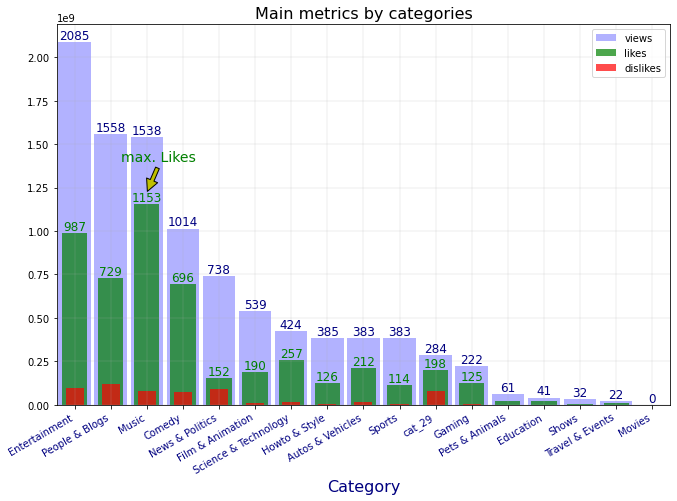

In [ ]:
df_cat['views'].plot(kind = 'bar',  width = 0.9, alpha = 0.3, color ='b')
df_cat['likes'].plot(kind = 'bar',  width = 0.7, alpha = 0.7, color = 'g')
df_cat['dislikes'].plot(kind = 'bar',  width = 0.5, alpha = 0.7, color = 'r')
plt.title('Main metrics by categories', fontsize = 16)
plt.legend(loc='best')
plt.grid(linewidth = 0.2)
plt.xlabel('Category', color ='navy', fontsize = 16)
plt.xticks(rotation=30, horizontalalignment='right', color ='navy')
for i, val in enumerate(df_cat['views'].values):
    plt.text(i, val, int(val/1e6), horizontalalignment='center', verticalalignment='bottom', fontdict={'size':12, 'color':'navy'})
for i, val in enumerate(df_cat['likes'].values):
    if int(val/1e6) > 30:
        plt.text(i, val, int(val/1e6), horizontalalignment='center', verticalalignment='bottom', fontdict={'size':12, 'color':'g'})
plt.annotate('max. Likes', xy=(2,1.22e9), xytext=(1.3,1.4e9), color = "g", fontsize = 14,
            arrowprops=dict(facecolor='y', shrink=0.05))  
plt.show()      

Top 5 most popular categories in RU zone are:

1. Entertainment
2. Music
1. People & Blogs
1. Comedy
1. News & Politics  

Music videos deserved more likes than other categories.  

Let's check `likes / dislikes` distribution.



In [ ]:
df_cat['disl_prop'] = df_cat['dislikes'] /df_cat['likes']
df_cat['likes_prop'] = 1-df_cat['disl_prop']

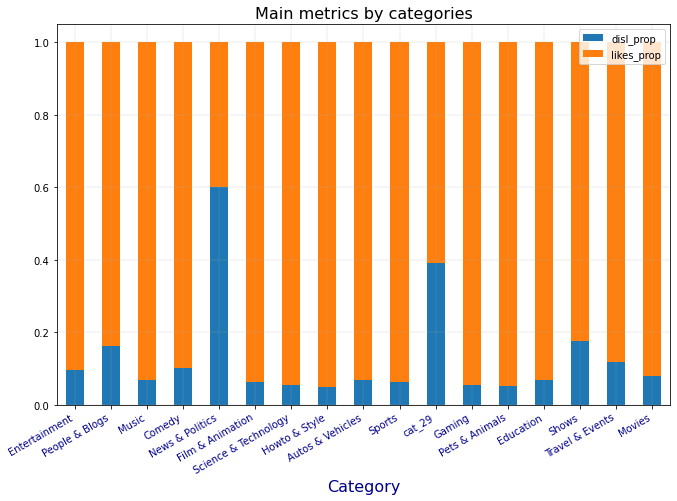

In [ ]:
# df_cat['views'].plot(kind = 'bar',  width = 0.9, alpha = 0.3, color ='b')
df_cat[['disl_prop','likes_prop']].plot(kind = 'bar',  stacked=True)
# df_cat[].plot(kind = 'bar',  width = 0.5, alpha = 0.7, color = 'r')
plt.title('Main metrics by categories', fontsize = 16)
plt.legend(loc='best')
plt.grid(linewidth = 0.2)
plt.xlabel('Category', color ='darkblue', fontsize = 16)
plt.xticks(rotation=30, horizontalalignment='right', color ='darkblue')
# for i, val in enumerate(df_cat['views'].values):
#     plt.text(i, val, int(val/1e6), horizontalalignment='center', verticalalignment='bottom', fontdict={'size':12, 'color':'darkblue'})
# for i, val in enumerate(df_cat['likes'].values):
#     if int(val/1e6) > 3:
#         plt.text(i, val, int(val/1e6), horizontalalignment='center', verticalalignment='bottom', fontdict={'size':12, 'color':'g'})
# plt.annotate('max. Likes', xy=(2,20e7), xytext=(1.5,3e8), color = "g", fontsize = 14,
#             arrowprops=dict(facecolor='y', shrink=0.05))  
plt.show()    

As we mentioned earlier `News & Politics` and `Cat_29` categories have abnormally  **dislikes** proportions.  

### Is it statistically significant?

In [ ]:
df_cat

,views,likes,dislikes,disl_prop,likes_prop
cat_name,,,,,
Entertainment,2085173930,987226810,94684230,0.095909,0.904091
People & Blogs,1558812093,729333740,117417320,0.160993,0.839007
Music,1538205868,1153468540,79157270,0.068625,0.931375
Comedy,1014380959,696573390,71153440,0.102148,0.897852
News & Politics,738971930,152718340,91774530,0.600940,0.399060
Film & Animation,539714214,190845580,11839990,0.062040,0.937960
Science & Technology,424310893,257388570,14282420,0.055490,0.944510
Howto & Style,385738449,126854770,6304620,0.049700,0.950300
Autos & Vehicles,383260752,212075650,14711380,0.069369,0.930631


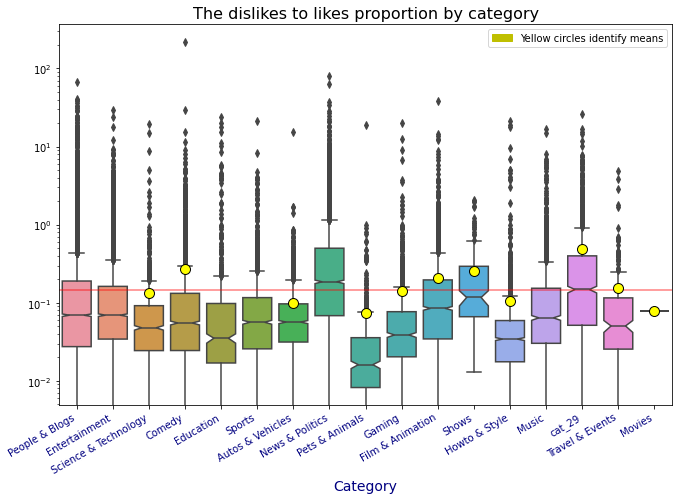

In [ ]:
sns.boxplot(x='cat_name', y=df_RU.dislikes / df_RU.likes, 
            data=df_RU, notch=True, showmeans=True,
            meanprops={"marker":"o",
            "markerfacecolor":"yellow", 
            "markeredgecolor":"black",
            "markersize":"10"})
plt.axhline(y=0.145, color='r', alpha = 0.5, linestyle='-')
plt.xticks(rotation=30, horizontalalignment='right', color ='navy')
plt.title('The dislikes to likes proportion by category', fontsize=16)
plt.xlabel('Category', color ='navy', fontsize = 14)
plt.yscale("log") 
yellow_patch = mpatches.Patch(color='y', label='Yellow circles identify means')
plt.legend(handles=[yellow_patch], loc='upper right')

We can assume that the most patient audience gathers around category `Pets & Animals`.  
Most agressive are in `News & Politics` and mysterious 'Cat_29'.

## Main metrics by trending dates

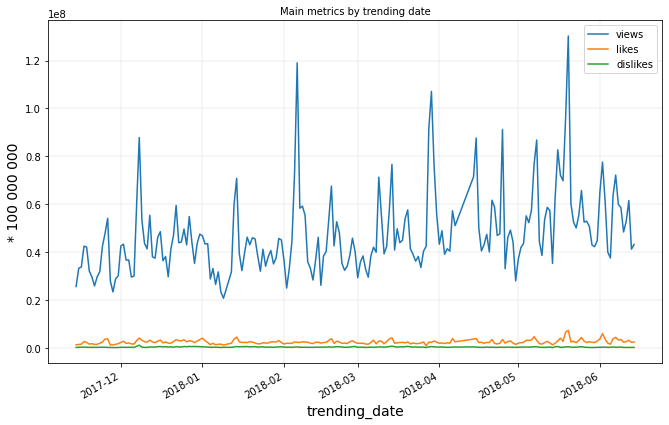

In [ ]:
df_RU[['views','likes','dislikes','cat_name','trending_date']]\
.groupby('trending_date').sum()\
.plot(title='Main metrics by trending date',
      ylabel= '* 100 000 000')
plt.grid(linewidth = 0.2)

Sometimes a significant peaks in views are observed.  
Possible expanation is a super viral video that breaks the trend.

In [ ]:
fig = px.line(df_RU, x='trending_date', y = 'views', title = "Views with Slider")
fig.update_xaxes(rangeslider_visible = True)
fig.show()

In [ ]:
# Let's find 30 most viewed videos
top30_df = df_RU.sort_values(by='views', ascending=False).head(30)[['views','cat_name', 'channel_title','title']]
top30_df.style.bar(align='mid', color = 'orange')

,views,cat_name,channel_title,title
35688,62796390,Music,ibighit,BTS (방탄소년단) 'FAKE LOVE' Official MV
4833,52611730,Entertainment,YouTube Spotlight,YouTube Rewind: The Shape of 2017 | #YouTubeRewind
35528,39349927,Music,ibighit,BTS (방탄소년단) 'FAKE LOVE' Official MV
16449,35832484,People & Blogs,Kylie Jenner,To Our Daughter
33377,31648454,Music,ChildishGambinoVEVO,Childish Gambino - This Is America (Official Video)
30739,27973210,Entertainment,Sony Pictures Entertainment,VENOM - Official Trailer (HD)
4608,24784870,Entertainment,YouTube Spotlight,YouTube Rewind: The Shape of 2017 | #YouTubeRewind
23609,24262331,Music,TaylorSwiftVEVO,Taylor Swift - Delicate
11844,23198594,Music,TaylorSwiftVEVO,"Taylor Swift - End Game ft. Ed Sheeran, Future"
16231,20921796,People & Blogs,Kylie Jenner,To Our Daughter


In [ ]:
# top 30 categories distribution
cat30distr_df = pd.DataFrame(top30_df['cat_name'].value_counts())
cat30distr_df.style.bar(align='mid', color = 'coral')

,cat_name
Music,15
Entertainment,8
Science & Technology,4
People & Blogs,2
Film & Animation,1


# Feature correlations

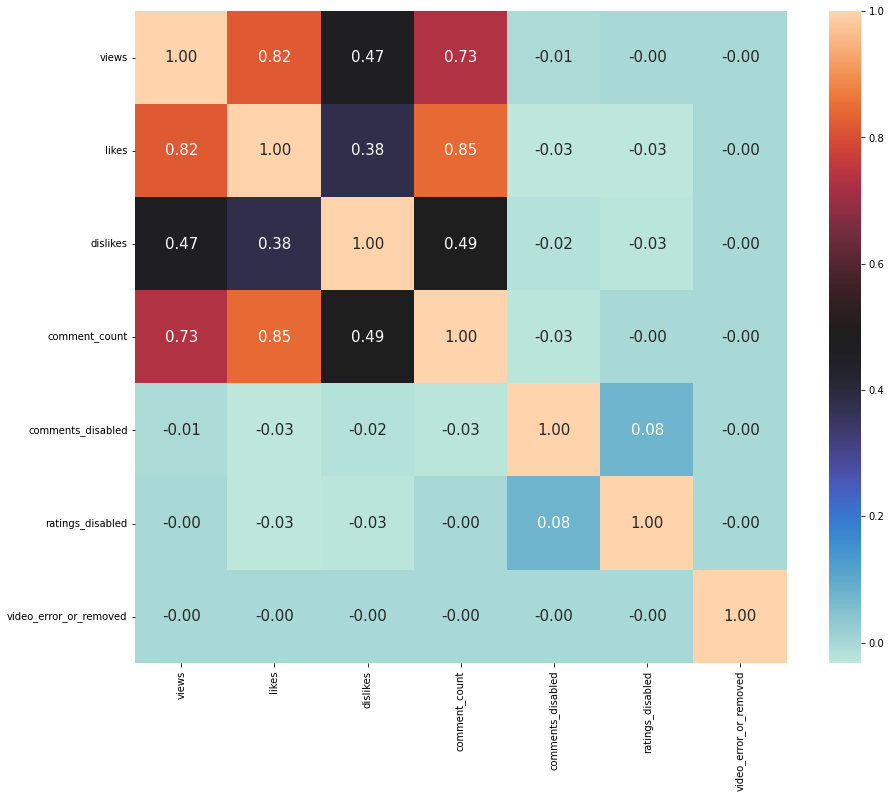

In [ ]:
df_corr = df_RU.corr()
# Plotting the heatmap of correlation between features
plt.figure(figsize=(15,12))
sns.heatmap(df_corr, cbar=True, square= True, fmt='.2f', annot=True, annot_kws={'size':15}, cmap='icefire')

We discover strong correlation between

> **`views`** and  **`likes ,  comment_count`**.


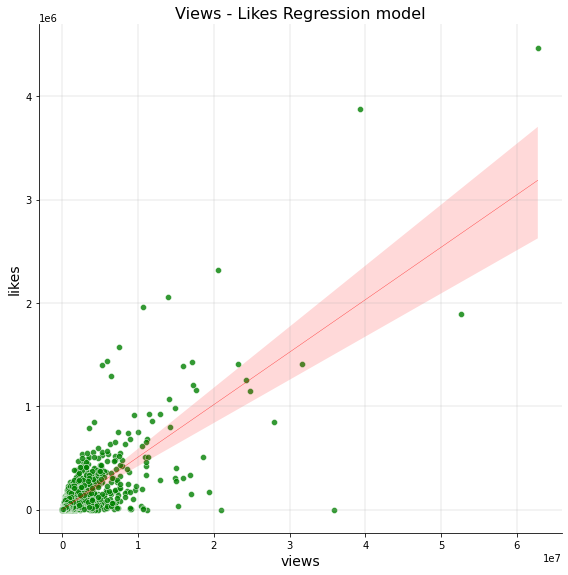

In [ ]:
sns.lmplot(x = 'views',y = 'likes', data = df_RU, height=8,
           scatter_kws={"color": "green", "linewidths" : .5, "edgecolors" : 'w'},
           line_kws={"color": "red", "linewidth": 0.3})
plt.grid(linewidth = 0.3)
plt.title('Views - Likes Regression model', fontsize =16)
plt.show()

### Analyzing vews distribution

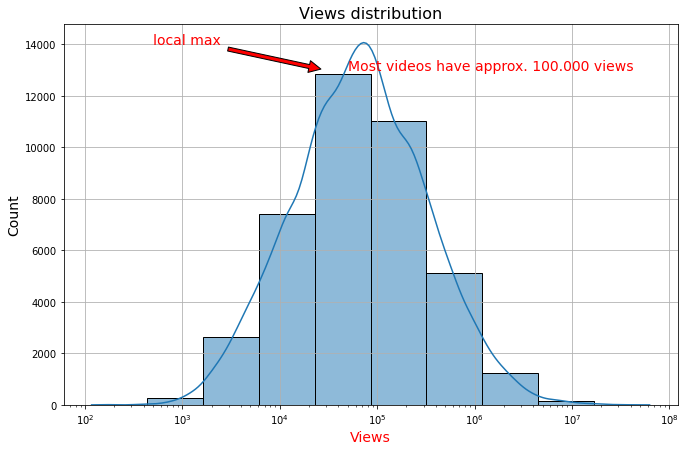

In [ ]:
ax = sns.histplot(df_RU['views'],  edgecolor='black', log_scale=True, bins =10, kde=True)
ax.grid()
ax.text(5e4,13e3,"Most videos have approx. 100.000 views", fontsize = 14, color = 'r')
ax.annotate('local max', xy=(3e4,13e3), xytext=(5e2,14e3), color = "r", fontsize = 14,
            arrowprops=dict(facecolor='r', shrink=0.05))
ax.set_xlabel("Views", fontsize = 14, color = 'r')
plt.title('Views distribution', fontsize = 16)
plt.show()

We can assume that most videos are made by professionals as they achive high coverage (views).  
The real distribution is not normal but highly right skewed.  
Only few become viral.

Well.  
We could make some obviuos assumptions but definetely not this year.

In [ ]:
# Channels having more 50 mlns views
channel_group_df = df_RU[['cat_name','views','likes', 'dislikes',\
                          'comment_count','channel_title']]\
                          .groupby(by = ['channel_title','cat_name'])\
                          .sum().sort_values(by='views', ascending=False)
channel_group_df.query('views > 5e7').style.bar(align='mid', color = 'coral')

,,views,likes,dislikes,comment_count
channel_title,cat_name,,,,
Трум Трум,Howto & Style,178367393,5146057,243065,603022
ibighit,Music,175903499,21176320,290816,3416043
вДудь,People & Blogs,127282959,6000832,775791,1169394
Алексей Навальный,cat_29,124696526,14094491,5809715,3085679
SlivkiShow,Entertainment,123175267,10059894,328535,940911
Wylsacom,Science & Technology,111269697,9210521,723603,3798416
SOBOLEV,People & Blogs,99780833,11074231,1003886,1029913
Мастерская Настроения,Entertainment,90552175,3096414,204898,256861
AcademeG,Autos & Vehicles,88411224,5416161,415460,394240
